In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [ ]:
!wget -O test_set2.zip "https://dms.uom.lk/s/9q8KSmmsiPa5cBx/download" 
!unzip -qq test_set2.zip -d /content/test_set2 

--2022-03-14 12:51:24--  https://dms.uom.lk/s/9q8KSmmsiPa5cBx/download
Resolving dms.uom.lk (dms.uom.lk)... 192.248.8.71, 2401:dd00:10:1::71
Connecting to dms.uom.lk (dms.uom.lk)|192.248.8.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 786232046 (750M) [application/zip]
Saving to: ‘test_set2.zip’

test_set2.zip       100%[===================>] 749.81M  12.6MB/s    in 61s     

2022-03-14 12:52:26 (12.4 MB/s) - ‘test_set2.zip’ saved [786232046/786232046]



## get camera details

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

narrow_cam_data_drive_file = os.path.join('/content/drive/My Drive/university/fyp/camera_details/narrow_cam_data.txt')
narrow_cam_data_colab_file = os.path.join('/content/narrow_cam_data.txt')

shutil.copyfile(narrow_cam_data_drive_file, narrow_cam_data_colab_file)

Mounted at /content/drive


'/content/narrow_cam_data.txt'

In [ ]:
narrow_cam_details_file = '/content/narrow_cam_data.txt'

camera_matrix_raw = 15
distortion_raw = 20
rectification_raw = 23
projection_raw = 27

w,h = 1920,1080

camera_mtx_narrow = np.loadtxt(narrow_cam_details_file, dtype=np.float32, skiprows=camera_matrix_raw-1, max_rows=3, delimiter=' ')
dist_coff_narrow = np.loadtxt(narrow_cam_details_file, dtype=np.float32, skiprows=distortion_raw-1,max_rows=1, delimiter=' ')
newcameramtx_narrow, roi = cv2.getOptimalNewCameraMatrix(camera_mtx_narrow, dist_coff_narrow, (w,h), 1, (w,h))

## get image list

In [ ]:
img_folder = '/content/test_set2/sample'
img_list = [file for file in os.listdir(img_folder) if file.endswith('jpg')]
wide_img_list = [img for img in img_list if 'wide' in img]
narrow_img_list = [img for img in img_list if 'narrow' in img]

wide_img_list.sort()
narrow_img_list.sort()

## undistort narrow angle frames

In [ ]:
count = 0
undist_narrow_img_list = []
for narrow_img_name in narrow_img_list:
  narrow_img = cv2.imread(os.path.join(img_folder, narrow_img_name))
  narrow_img_undist = cv2.undistort(narrow_img, camera_mtx_narrow, dist_coff_narrow, None, newcameramtx_narrow)
  cv2.imwrite(os.path.join(img_folder,narrow_img_name[:-4]+'_undist'+'.jpg'),narrow_img_undist)
  undist_narrow_img_list.append(narrow_img_name[:-4]+'_undist'+'.jpg')
  print(count," ", end="")
  count += 1



0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  

In [ ]:
print(undist_narrow_img_list)

['narrow_t2_001_undist.jpg', 'narrow_t2_002_undist.jpg', 'narrow_t2_003_undist.jpg', 'narrow_t2_004_undist.jpg', 'narrow_t2_005_undist.jpg', 'narrow_t2_006_undist.jpg', 'narrow_t2_007_undist.jpg', 'narrow_t2_008_undist.jpg', 'narrow_t2_009_undist.jpg', 'narrow_t2_010_undist.jpg', 'narrow_t2_011_undist.jpg', 'narrow_t2_012_undist.jpg', 'narrow_t2_013_undist.jpg', 'narrow_t2_014_undist.jpg', 'narrow_t2_015_undist.jpg', 'narrow_t2_016_undist.jpg', 'narrow_t2_017_undist.jpg', 'narrow_t2_018_undist.jpg', 'narrow_t2_019_undist.jpg', 'narrow_t2_020_undist.jpg', 'narrow_t2_021_undist.jpg', 'narrow_t2_022_undist.jpg', 'narrow_t2_023_undist.jpg', 'narrow_t2_024_undist.jpg', 'narrow_t2_025_undist.jpg', 'narrow_t2_026_undist.jpg', 'narrow_t2_027_undist.jpg', 'narrow_t2_028_undist.jpg', 'narrow_t2_029_undist.jpg', 'narrow_t2_030_undist.jpg', 'narrow_t2_031_undist.jpg', 'narrow_t2_032_undist.jpg', 'narrow_t2_033_undist.jpg', 'narrow_t2_034_undist.jpg', 'narrow_t2_035_undist.jpg', 'narrow_t2_036_undi

In [ ]:
img_pair_file = open('img_pairs.txt', 'w')
for narrow_img,wide_img in zip(undist_narrow_img_list,wide_img_list):
    img_pair_file.write(wide_img+" "+narrow_img+"\n")

img_pair_file.close()

## super glue feature matching

In [ ]:
!git clone https://github.com/magicleap/SuperGluePretrainedNetwork.git
%cd /content/SuperGluePretrainedNetwork


Cloning into 'SuperGluePretrainedNetwork'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 182 (delta 10), reused 6 (delta 3), pack-reused 157
Receiving objects: 100% (182/182), 118.85 MiB | 31.64 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/SuperGluePretrainedNetwork


In [ ]:
output_dir = 'match_pairs'

In [ ]:
!python3 match_pairs.py --match_threshold 0.7 --resize -1 --superglue outdoor --max_keypoints 2048 --nms_radius 3  --resize_float --input_dir /content/test_set2/sample/ --input_pairs /content/img_pairs.txt --output_dir $output_dir

Namespace(cache=False, eval=False, fast_viz=False, force_cpu=False, input_dir='/content/test_set2/sample/', input_pairs='/content/img_pairs.txt', keypoint_threshold=0.005, match_threshold=0.7, max_keypoints=2048, max_length=-1, nms_radius=3, opencv_display=False, output_dir='match_pairs', resize=[-1], resize_float=True, show_keypoints=False, shuffle=False, sinkhorn_iterations=20, superglue='outdoor', viz=False, viz_extension='png')
Will not resize images
Running inference on device "cuda"
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Looking for data in directory "/content/test_set2/sample"
Will write matches to directory "match_pairs"
[Finished pair     0 of   478] load_image=0.057 matcher=1.211 total=1.268 sec {0.8 FPS} 
[Finished pair     1 of   478] load_image=0.054 matcher=1.173 total=1.227 sec {0.8 FPS} 
[Finished pair     2 of   478] load_image=0.052 matcher=1.147 total=1.199 sec {0.8 FPS} 
[Finished pair     3 of   478] load_image=0.050 matcher=1.130 total=

## get homography matrices

In [ ]:
pair_list = [file for file in os.listdir(output_dir) if file.endswith('npz')]
pair_list.sort()

In [ ]:
print(len(pair_list))

478


In [ ]:
match_pair_arr = []
homography_mtx_array = []

for file in pair_list:
  npz = np.load(os.path.join(output_dir,file))
  keypoints0 = npz['keypoints0'] # wide
  keypoints1 = npz['keypoints1'] # narrow
  matches =  npz['matches']
  match_confidence = npz['match_confidence']

  ####################
  # valid = matches > -1
  # mkpts0 = kpts0[valid]
  # mkpts1 = kpts1[matches[valid]]
  # mconf = conf[valid]
  ##########################
    

  # print(keypoints0.shape)
  # print(keypoints1.shape)
  # print(matches.shape)
  # print(match_confidence.shape)

  ## remove not used points 
  valid = matches > -1
  keypoints0_filtered = keypoints0[valid]  # wide
  keypoints1_filtered = keypoints1[matches[valid]] # narrow
  match_confidence_filtered = match_confidence[valid]

  ## sort by confidence
  idx_order = np.argsort(match_confidence_filtered)
  keypoints0_sorted = keypoints0_filtered[idx_order[::-1]] # wide
  keypoints1_sorted = keypoints1_filtered[idx_order[::-1]] # narrow
  match_confidence_sorted = match_confidence_filtered[idx_order[::-1]]

  # ## remove matches related to time on the image
  time_x_coord = 1200
  time_y_coord = 100
  remove_idx = [idx for idx in range(len(keypoints0_sorted)) if ((keypoints0_sorted[idx,0]>time_x_coord) and (keypoints0_sorted[idx,1]<time_y_coord)) ]
  # print(keypoints0_sorted)
  # print(keypoints1_sorted)
  # print(match_confidence_sorted)
  # print(remove_idx)

  keypoints_wide = np.delete(keypoints0_sorted,remove_idx,axis=0)
  keypoints_narrow = np.delete(keypoints1_sorted,remove_idx,axis=0)

  # # print(keypoints_wide)
  # # print(keypoints_narrow)
  keypoints_wide = keypoints_wide.reshape(-1,1,2)
  keypoints_narrow = keypoints_narrow.reshape(-1,1,2)

  # keypoints_wide  = np.flip(keypoints_wide,axis=2)
  # keypoints_narrow = np.flip(keypoints_narrow,axis=2)

  # print(keypoints_wide.shape)
  # print(keypoints_narrow.shape)
  # break
  ## get the first 10 points
  min_length = 20
  if (len(keypoints_wide)>min_length):
    homography_mtx, mask = cv2.findHomography(keypoints_narrow[:min_length], keypoints_wide[:min_length], cv2.RANSAC,5.0)
    homography_mtx_array.append(homography_mtx)
    pair = {'wide':keypoints_wide,'narrow':keypoints_narrow}
    match_pair_arr.append(pair)
  # break

homography_mtx_array = np.array(homography_mtx_array)


In [ ]:
print(homography_mtx_array.shape)

(359, 3, 3)


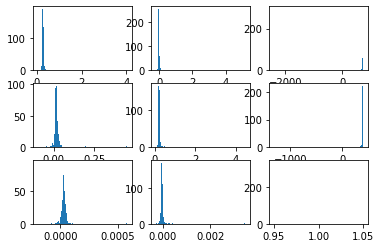

In [ ]:
i = 1
for x in range(3):
    for y in range(3):
        val_array = np.squeeze(homography_mtx_array[:,x,y])
        plt.subplot(3,3,i)
        plt.hist(val_array,bins=100)
        i +=1
plt.show()

In [ ]:
## reject outliers considering median (median is more robust to outliers than mean)
## from https://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

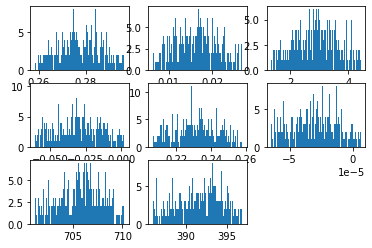

[[ 2.77135723e-01 -3.01593003e-02  7.05725743e+02]
 [ 1.63336895e-02  2.31441920e-01  3.91648257e+02]
 [ 2.86333928e-05 -3.10172811e-05  1.00000000e+00]]


In [ ]:
homography_mtx = np.zeros((3,3))
std_matrix = np.zeros((3,3))
i = 1

for x in range (3):
    for y in range (3):
        val_array = np.squeeze(homography_mtx_array[:,y,x])
        val_array = reject_outliers(data=val_array,m=2)
        value = np.mean(val_array)
        homography_mtx[y,x] = value
        std_matrix[y,x] = np.std(val_array)
        ###
        if not (i==9):
            plt.subplot(3,3,i)
            plt.hist(val_array,bins=100)
            i+=1

plt.show()
print(homography_mtx)

In [ ]:
print("std before remove outliers")
print(np.std(homography_mtx_array,axis=0))

print("\nstd after remove outliers")
print(std_matrix)

std before remove outliers
[[2.11218984e-01 2.86593882e-01 1.70318327e+02]
 [2.76270667e-02 2.43272098e-01 9.47098558e+01]
 [4.10451353e-05 2.02627792e-04 3.20939841e-17]]

std after remove outliers
[[9.11361741e-03 1.57103616e-02 2.19717529e+00]
 [4.95258506e-03 1.25123339e-02 2.74820657e+00]
 [7.40869377e-06 1.77434720e-05 3.20939841e-17]]


## test on images

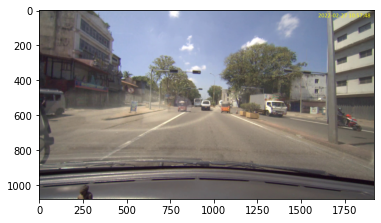

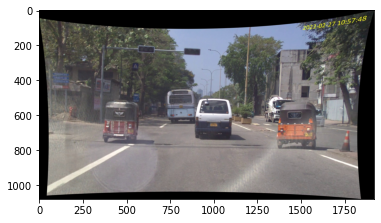

In [ ]:
wide_img = cv2.imread('/content/test_set2/sample/wide_t2_001.jpg')
wide_img = cv2.cvtColor(wide_img, cv2.COLOR_BGR2RGB)
plt.imshow(wide_img)
plt.show()

narrow_img_undist = cv2.imread('/content/test_set2/sample/narrow_t2_001_undist.jpg')
narrow_img_undist = cv2.cvtColor(narrow_img_undist, cv2.COLOR_BGR2RGB)
plt.imshow(narrow_img_undist)
plt.show()

(1080, 1920)


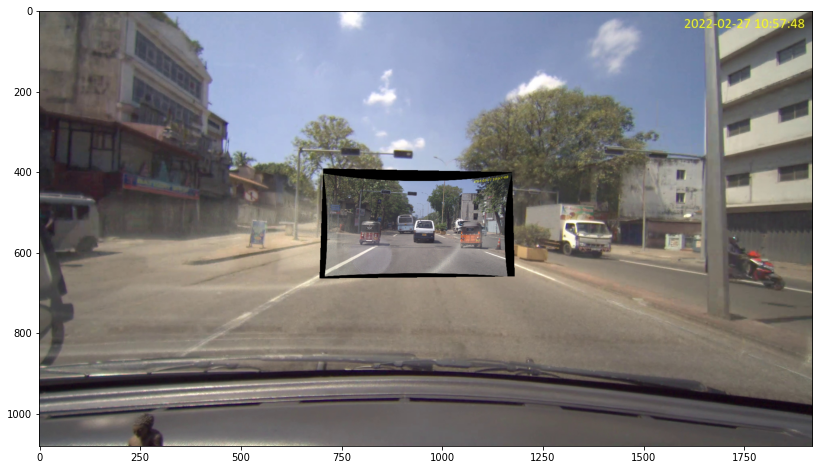

(<matplotlib.image.AxesImage at 0x7fe9657e1250>, None)

In [ ]:
# M = np.loadtxt('homography_matrix.txt', usecols=range(3))

pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,homography_mtx)

warped_narrow_img = cv2.warpPerspective(narrow_img_undist, homography_mtx, (w, h)) #wraped image

# plt.imshow(dst, 'gray'),plt.show()
dst_2 = np.squeeze(dst)
mask = np.zeros(wide_img.shape[0:2])
print(mask.shape)
cv2.fillPoly(mask,np.int32([dst_2]),1)
poly_copied = cv2.bitwise_and(warped_narrow_img,warped_narrow_img,mask = np.uint8(mask))
# plt.imshow(poly_copied, ),plt.show()

mask_inverse = np.ones(narrow_img_undist.shape[0:2])
#assuming src1 and src2 are of same size
cv2.fillPoly(mask_inverse,np.int32([dst_2]),0)
img1_middle_removed = cv2.bitwise_and(wide_img,wide_img,mask = np.uint8(mask_inverse))

concatted_img = np.add(poly_copied,img1_middle_removed)
plt.figure(figsize = (20,8))
plt.imshow(concatted_img,),plt.show()
# cv2.imwrite("stitched_img.png",cv.cvtColor(concatted_img,cv.COLOR_RGB2BGR))

## save matrices

In [ ]:
np.savetxt('/content/drive/My Drive/university/fyp/camera_details/homography_matrix_super_glue.txt',homography_mtx)
np.save('/content/drive/My Drive/university/fyp/camera_details/homography_mtx_array_super_glue.npy', homography_mtx_array)

In [ ]:
pair = match_pair_arr[0]
wide_points = pair['wide']
narrow_points = pair['narrow']

In [ ]:
print(wide_points)
print(narrow_points)

In [ ]:
narrow_img = cv2.imread('/content/test_set2/sample/narrow_t2_001_undist.jpg')
wide_img = cv2.imread('/content/test_set2/sample/wide_t2_001.jpg')

In [ ]:
for i in range(len(narrow_points)):
  narrow_img = cv2.circle(narrow_img, tuple(narrow_points[i][0]), 2, (255, 255, 0),5)
  wide_img = cv2.circle(wide_img, tuple(wide_points[i][0]), 2, (255, 255, 0),5)
  # narrow_img = cv2.putText(narrow_img, str(i),  tuple(narrow_points[i][0]), cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 0, 0), 4, cv2.LINE_AA)
  # wide_img = cv2.putText(wide_img, str(i),  tuple(wide_points[i][0]), cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 0, 0), 4, cv2.LINE_AA)

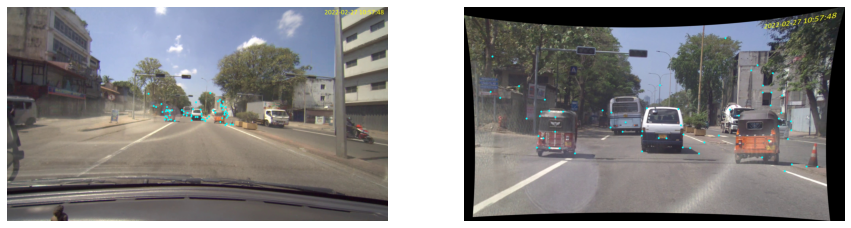

In [ ]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize=( 3*5, 6), squeeze=False )
axes[0][1].imshow(cv2.cvtColor(narrow_img, cv2.COLOR_BGR2RGB))   
axes[0][0].imshow(cv2.cvtColor(wide_img, cv2.COLOR_BGR2RGB))   
axes[0][0].axis('off')
axes[0][1].axis('off')
plt.show()

In [ ]:
def calc_homograpy(narrow_img, wide_img, MIN_MATCH_COUNT):

    # Initiate SIFT detector
    sift =cv2.xfeatures2d.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(narrow_img,None)
    kp2, des2 = sift.detectAndCompute(wide_img,None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)


    #######################
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        # print(M)
        matchesMask = mask.ravel().tolist()

        draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
        img3 = cv2.drawMatches(narrow_img,kp1,wide_img,kp2,good,None,**draw_params)
        plt.imshow(img3, 'gray'),plt.show()

    else:
        print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
        matchesMask = None


    return M

In [ ]:
M = calc_homograpy(narrow_img=narrow_img, wide_img=wide_img, MIN_MATCH_COUNT=10)
print(M)

error: ignored